## Data Analysis with Python and Pandas

### Creating and Navigating a Dataframe

In [1]:
import pandas as pd

In [2]:
starting = {
    'col_1':[5,2,4,7,2,4],
    'col_2':[7,8,2,1,8,9],
    'col_3':[10,4,2,1,9,10],
    'Name':['HG','TY','CS','YU','PO','XW'],
    'col_4':[5,6,7,1,5,6],
    'col_5':[9,9,2,1,3,9],
    'col_6':[7,8,2,1,1,0]
}

df = pd.DataFrame(starting)
df

,col_1,col_2,col_3,Name,col_4,col_5,col_6
0,5,7,10,HG,5,9,7
1,2,8,4,TY,6,9,8
2,4,2,2,CS,7,2,2
3,7,1,1,YU,1,1,1
4,2,8,9,PO,5,3,1
5,4,9,10,XW,6,9,0


In [3]:
df.dtypes

col_1     int64
col_2     int64
col_3     int64
Name     object
col_4     int64
col_5     int64
col_6     int64
dtype: object

In [4]:
df['col_1'][2]

4

In [5]:
df.head(2)

,col_1,col_2,col_3,Name,col_4,col_5,col_6
0,5,7,10,HG,5,9,7
1,2,8,4,TY,6,9,8


In [6]:
df.tail(2)

,col_1,col_2,col_3,Name,col_4,col_5,col_6
4,2,8,9,PO,5,3,1
5,4,9,10,XW,6,9,0


In [7]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [8]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [9]:
df

,col_1,col_2,col_3,Name,col_4,col_5,col_6
0,5,7,10,HG,5,9,7
1,2,8,4,TY,6,9,8
2,4,2,2,CS,7,2,2
3,7,1,1,YU,1,1,1
4,2,8,9,PO,5,3,1
5,4,9,10,XW,6,9,0


### Visualising Pandas Dataframe

In [10]:
import pandas as pd
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

data = sns.load_dataset('car_crashes')
data.head()


Bad key "axes.color_cycle" on line 3 in
/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/ourstyle.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


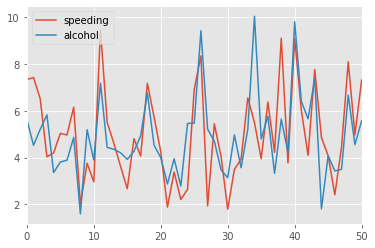

In [11]:
# data['speeding'].plot()
# data['alcohol'].plot()
data[['speeding','alcohol']].plot()
plt.legend()
plt.show()

In [12]:
data['speeding'].tolist()[-2]

4.968

In [13]:
data[['speeding','alcohol']].corr().iloc[1,0]

0.6697185644227317

### IO Operations - CSV

In [14]:
import pandas as pd
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

data = sns.load_dataset('car_crashes')
data[['speeding','alcohol']].to_csv('speed_alcohol.csv')

In [15]:
data_sample = pd.read_csv('speed_alcohol.csv',index_col=0)
data_sample.head()

,speeding,alcohol
0,7.332,5.640
1,7.421,4.525
2,6.510,5.208
3,4.032,5.824
4,4.200,3.360


### IO Operations - HDF

### Data Manipulation

In [16]:
import pandas as pd
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

data = sns.load_dataset('car_crashes')
# data['n'] = data['alcohol'] + data['speeding']
# data['not_distracted'] = data['not_distracted']/10


data['over_speeding'] = data['speeding'] > 6
data2 = data[data['speeding'] > 7.8]
data2.head()




,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,over_speeding
11,17.5,9.450,7.175,14.350,15.225,861.18,120.92,HI,True
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT,True
38,18.2,9.100,5.642,17.472,16.016,905.99,153.86,PA,True
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC,True
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV,True


### Statistical Analysis with Pandas

In [17]:
describe = data.describe()
describe['ins_premium']

count      51.000000
mean      886.957647
std       178.296285
min       641.960000
25%       768.430000
50%       858.970000
75%      1007.945000
max      1301.520000
Name: ins_premium, dtype: float64

In [18]:
data['5_AVG_Speed'] = data['speeding'].rolling(5).mean()
data['10__AVG_Speed'] = data['speeding'].rolling(10).mean()

In [19]:
data['5_STD_Speed'] = data['speeding'].rolling(5).std()
data['10_STD_Speed'] = data['speeding'].rolling(10).std()

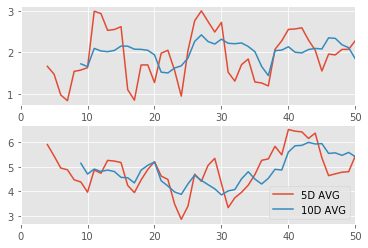

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data['5_AVG_Speed'].plot(ax=axes[1], label='5D AVG')
data['10__AVG_Speed'].plot(ax=axes[1], label='10D AVG')
data['5_STD_Speed'].plot(ax=axes[0], label='5D STD')
data['10_STD_Speed'].plot(ax=axes[0], label='10D STD')

plt.legend(loc=4)
plt.show()

In [21]:
from statistics import mean

def moving_average(data):
    return mean(data)


In [22]:
data['5D_AVG_Speed'] =  data['speeding'].rolling(5).apply(moving_average)

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


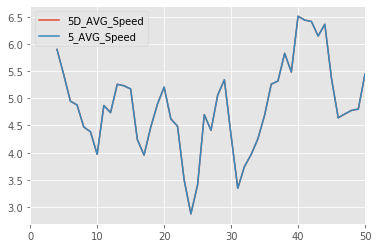

In [23]:
data[['5D_AVG_Speed', '5_AVG_Speed']].plot()

In [24]:
data[['5D_AVG_Speed', '5_AVG_Speed']].corr()

,5D_AVG_Speed,5_AVG_Speed
5D_AVG_Speed,1.0,1.0
5_AVG_Speed,1.0,1.0


In [25]:
data.dropna().head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,over_speeding,5_AVG_Speed,10__AVG_Speed,5_STD_Speed,10_STD_Speed,5D_AVG_Speed
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,False,4.3842,5.1416,1.576900,1.725578,4.3842
10,15.6,2.964,3.900,14.820,14.508,913.15,142.80,GA,False,3.9706,4.7048,1.634660,1.661149,3.9706
11,17.5,9.450,7.175,14.350,15.225,861.18,120.92,HI,True,4.8670,4.9077,2.987466,2.096617,4.8670
12,15.3,5.508,4.437,13.005,14.994,641.96,82.75,ID,False,4.7374,4.8075,2.931091,2.034558,4.7374
13,12.8,4.608,4.352,12.032,12.288,803.11,139.15,IL,False,5.2578,4.8651,2.528206,2.018251,5.2578


In [26]:
# Fill forward - use past data for missing data
data.fillna(method='ffill')
# Fill backward - use future data for missing data
data.fillna(method='bfill')
# Fill with a specific value - use data as an outlier 
## Using limits
one_pct = int(len(data) * 0.05)
data.fillna(value = 9999, limit=one_pct).head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,over_speeding,5_AVG_Speed,10__AVG_Speed,5_STD_Speed,10_STD_Speed,5D_AVG_Speed
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,True,9999.000,9999.0,9999.000000,9999.0,9999.000
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,True,9999.000,9999.0,9999.000000,9999.0,9999.000
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,True,NaN,NaN,NaN,NaN,NaN
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,False,NaN,NaN,NaN,NaN,NaN
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,False,5.899,NaN,1.667002,NaN,5.899


In [27]:
one_pct = int(len(data) * 0.05)

In [28]:
one_pct

2

### Detecting Outliers - Example 1

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
%matplotlib inline 

style.use('ggplot')

bridge_reading = {'Distance_mm':[50012, 50015, 5024012, 50007, 50016, 50014]}
df = pd.DataFrame(bridge_reading)
# df.boxplot(column='Distance_mm')
# plt.show()
# stats = df.describe()
# print(stats)
# print(stats['Distance_mm']['std'])
df['std'] = df['Distance_mm'].rolling(2).std()
df = df[df['std'] < 50]
df

,Distance_mm,std
1,50015,2.121320
4,50016,6.363961
5,50014,1.414214


### Detecting Outliers - Example 2

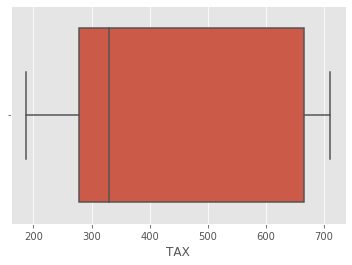

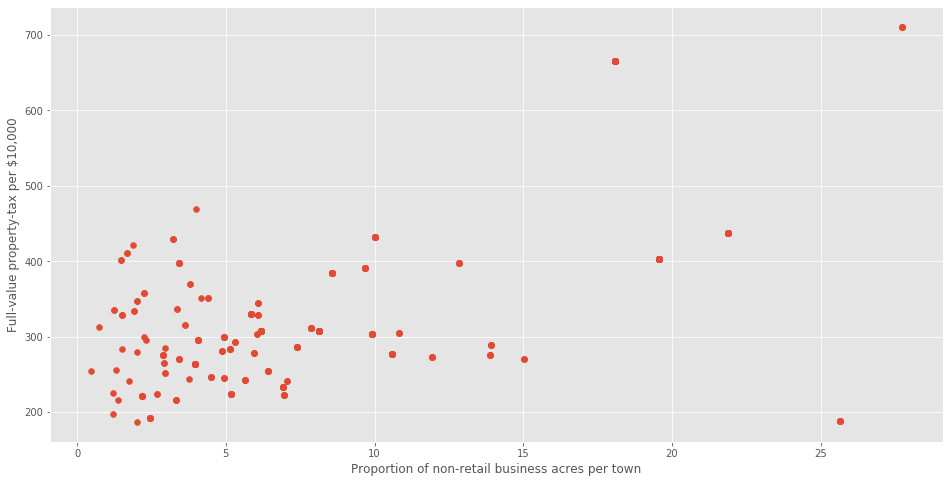

In [30]:
from sklearn.datasets import load_boston
import seaborn as sns

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

# Create the dataframe 
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns 
boston_df.head()

sns.boxplot(x=boston_df['TAX'])

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax per $10,000')
plt.show()

In [31]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [32]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [33]:
z[102][11]

3.134425327914092

In [34]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
Q1 = boston_df.quantile(0.25)
Q3= boston_df.quantile(0.75)
IQR = Q3 -Q1
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

In [36]:
print(boston_df[(boston_df < (Q1 - 1.5*IQR)) | (boston_df > (Q3 +1.5*IQR))])

        CRIM  ZN  INDUS  CHAS  NOX  RM  AGE  DIS  RAD  TAX  PTRATIO       B  \
0        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
1        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
2        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
3        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
4        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
5        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
6        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
7        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
8        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
9        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
10       NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
11       NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  Na

### Combining DataFrame 

#### Concat

In [37]:
import pandas as pd

df1 = pd.DataFrame({'Temp':[75,73,72,76], 
                    'Humidity':[30,45,32,42], 
                    'Precip':[0,0,0,1]}, 
                   index=[0,1,2,3])

df2 = pd.DataFrame({'Temp':[76,79,77,77], 
                    'Humidity':[33,35,37,23], 
                    'Precip':[1,0,1,1]}, 
                   index=[4,5,6,7])

df3 = pd.DataFrame({'Temp':[77,79,81,76], 
                    'Humidity':[40,42,42,43], 
                    'Precip':[0,1,1,1]}, 
                   index=[8,9,10,11])

df4 = pd.DataFrame({'Temp':[77,79,81,76], 
                    'Humidity':[40,42,42,43], 
                    'Wind':[15,11,12,13]}, 
                   index=[12,13,14,15])


concat = pd.concat([df1,df2,df3], axis=0)
concat2 = pd.concat([df1,df2,df4], axis=0)
concat2

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Humidity,Precip,Temp,Wind
0,30,0.0,75,NaN
1,45,0.0,73,NaN
2,32,0.0,72,NaN
3,42,1.0,76,NaN
4,33,1.0,76,NaN
5,35,0.0,79,NaN
6,37,1.0,77,NaN
7,23,1.0,77,NaN
12,40,NaN,77,15.0
13,42,NaN,79,11.0


#### Append DataFrame

In [38]:
df1.append(df3,ignore_index=True)

,Temp,Humidity,Precip
0,75,30,0
1,73,45,0
2,72,32,0
3,76,42,1
4,77,40,0
5,79,42,1
6,81,42,1
7,76,43,1


In [39]:
s = pd.Series([81,36, 0], index=['Temp','Humidity','Precip'])
s

Temp        81
Humidity    36
Precip       0
dtype: int64

In [40]:
df1.append(s,ignore_index=True)

,Temp,Humidity,Precip
0,75,30,0
1,73,45,0
2,72,32,0
3,76,42,1
4,81,36,0


#### Merging DataFrame

In [41]:
import pandas as pd

df1 = pd.DataFrame({'Temp':[75,73,72,76], 
                    'Humidity':[30,45,32,42], 
                    'Precip':[0,0,0,1]})

df2 = pd.DataFrame({'Temp':[75,73,72,76], 
                    'Wind':[33,35,37,33], 
                    'Cloudy':[1,0,1,1]})

pd.merge(df1, df2, on='Temp')

,Temp,Humidity,Precip,Wind,Cloudy
0,75,30,0,33,1
1,73,45,0,35,0
2,72,32,0,37,1
3,76,42,1,33,1


In [42]:
main_users = pd.DataFrame({'Username':['James','Sanjay','Karl', 'Kelly'], 
                           'Password':['P@ss0rd','1234', 'pass', 'pw'], 
                           'Join_Date':['Jan','Feb','June','March']})

forum_users = pd.DataFrame({'Username':['James','Sanjay','Karl', 'Kelly'], 
                           'Post_Count':[500, 521, 76, 888], 
                           'User_Status':[0,1,0,2]})

pd.merge(main_users, forum_users, on='Username')


,Username,Password,Join_Date,Post_Count,User_Status
0,James,P@ss0rd,Jan,500,0
1,Sanjay,1234,Feb,521,1
2,Karl,pass,June,76,0
3,Kelly,pw,March,888,2


#### Joining DataFrame

In [43]:
main_users.set_index('Username').join(forum_users.set_index('Username'))

,Password,Join_Date,Post_Count,User_Status
Username,,,,
James,P@ss0rd,Jan,500,0
Sanjay,1234,Feb,521,1
Karl,pass,June,76,0
Kelly,pw,March,888,2


### Advanced Operations

#### Basic Sorting

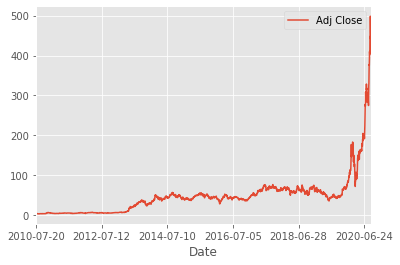

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('TSLA.csv', index_col=False)
# df.sort_values(by='Date', ascending=True, inplace=True)
df.set_index('Date', inplace=True)
df = df[['Adj Close']]
df.head()

df.plot()
plt.show()

#### Sorting By Multiple Rules

In [45]:
school = {'Name':['Jeff', 'Carrol', 'Kyle', 'Adrian', 'Jessica','Scott','Tanner','Kelly','Brittney','Joe'], 
          'Age':[18,17,15,15,16,17,18,19,18,14], 
          'Grade':[12,11,9,10,11,12,12,11,10,9]}

df = pd.DataFrame(school)
# print(df)

df2 = df.sort_values(by='Grade')
# df2

df3 = df.sort_values(by='Age')
# df3

df4 = df.sort_values(by=['Grade', 'Age', 'Name'], ascending=[False,True,True])
df4


,Name,Age,Grade
5,Scott,17,12
0,Jeff,18,12
6,Tanner,18,12
4,Jessica,16,11
1,Carrol,17,11
7,Kelly,19,11
3,Adrian,15,10
8,Brittney,18,10
9,Joe,14,9
2,Kyle,15,9


#### Resampling DataFrame

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 

style.use('fivethirtyeight')

df = pd.read_csv('TSLA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# df2 = df.resample('B').mean()
# df2

# df3 = df.resample('1M').mean()
# df3

# df3['Adj Close'].plot(figsize=(12,7))
# df2['Adj Close'].plot(figsize=(12,7))
# df['Adj Close'].plot(figsize=(12,7))

# plt.show()

df2 = df['Adj Close'].resample('1M').agg({
    'openbid':'first',
    'highbid':'max',
    'lowbid':'min',
    'closebid':'last'
})

type(df2)

pandas.core.series.Series

#### Correlation and Covariance 

In [47]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999299,0.999075,0.998514,0.998514,0.528323
High,0.999299,1.000000,0.998861,0.999376,0.999376,0.535250
Low,0.999075,0.998861,1.000000,0.999199,0.999199,0.523152
Close,0.998514,0.999376,0.999199,1.000000,1.000000,0.528436
Adj Close,0.998514,0.999376,0.999199,1.000000,1.000000,0.528436
Volume,0.528323,0.535250,0.523152,0.528436,0.528436,1.000000


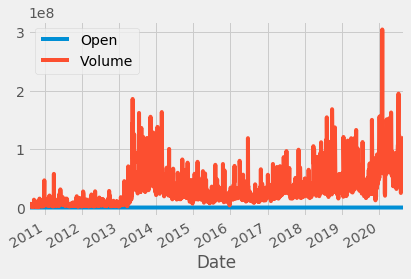

In [48]:
df[['Open','Volume']].plot()

#### Mapping custom functions

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

def pct_diff(v1, v2):
    pct = ((v2 - v1) / v1)*100.0
    return pct 



In [50]:
df = pd.read_csv('TSLA.csv')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-20,4.370,4.370,4.010,4.060,4.060,9126500
2010-07-21,4.132,4.180,3.900,4.044,4.044,6262500
2010-07-22,4.100,4.250,4.074,4.200,4.200,4789000
2010-07-23,4.238,4.312,4.212,4.258,4.258,3268000
2010-07-26,4.300,4.300,4.060,4.190,4.190,4611000


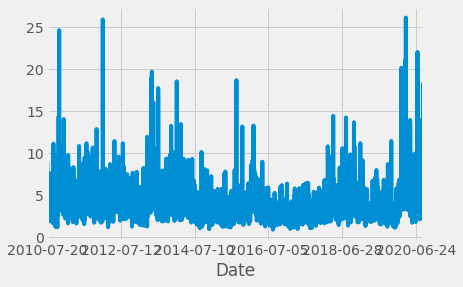

In [51]:
df['Pct_Diff_bot_5_vs_Top_5'] = list(map(pct_diff, df['Low'], df['High']))
df['Pct_Diff_bot_5_vs_Top_5'].plot()
plt.show()

In [52]:
df['Pct_Diff_bot_5_vs_Top_5_2'] = 100 * ((df['High'] /df['Low']) - 1)

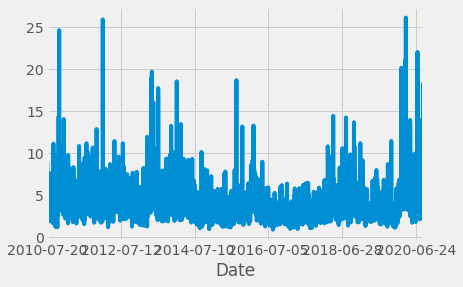

In [53]:
df['Pct_Diff_bot_5_vs_Top_5_2'].plot()

#### Buffering Basic 

In [54]:
import pandas as pd

def buffering_example():
    with open('TSLA.csv', buffering=15) as f:
        for line in f:
            print(line)
            
# buffering_example()

def buffering_with_pandas():
    chunks = pd.read_csv('TSLA.csv', chunksize=4)
    for c in chunks:
        print(c)
        
buffering_with_pandas()

         Date   Open   High    Low  Close  Adj Close   Volume
0  2010-07-20  4.370  4.370  4.010  4.060      4.060  9126500
1  2010-07-21  4.132  4.180  3.900  4.044      4.044  6262500
2  2010-07-22  4.100  4.250  4.074  4.200      4.200  4789000
3  2010-07-23  4.238  4.312  4.212  4.258      4.258  3268000
         Date   Open   High    Low  Close  Adj Close   Volume
4  2010-07-26  4.300  4.300  4.060  4.190      4.190  4611000
5  2010-07-27  4.182  4.236  4.052  4.110      4.110  3098500
6  2010-07-28  4.110  4.180  4.102  4.144      4.144  2336000
7  2010-07-29  4.154  4.176  4.000  4.070      4.070  3080000
          Date  Open   High    Low  Close  Adj Close   Volume
8   2010-07-30  4.04  4.088  3.910  3.988      3.988  2134500
9   2010-08-02  4.10  4.194  4.066  4.184      4.184  3590500
10  2010-08-03  4.20  4.390  4.164  4.390      4.390  6152500
11  2010-08-04  4.39  4.436  4.170  4.252      4.252  4565000
          Date   Open   High    Low  Close  Adj Close   Volume
12  201

           Date   Open   High    Low  Close  Adj Close   Volume
164  2011-03-14  4.764  4.800  4.640  4.650      4.650  5830000
165  2011-03-15  4.440  4.592  4.360  4.590      4.590  6594000
166  2011-03-16  4.572  4.650  4.538  4.564      4.564  5848500
167  2011-03-17  4.648  4.686  4.528  4.562      4.562  4613000
           Date   Open   High    Low  Close  Adj Close   Volume
168  2011-03-18  4.638  4.638  4.502  4.592      4.592  3439500
169  2011-03-21  4.610  4.610  4.508  4.546      4.546  2058500
170  2011-03-22  4.546  4.572  4.400  4.438      4.438  2914500
171  2011-03-23  4.422  4.454  4.354  4.442      4.442  2114000
           Date   Open   High    Low  Close  Adj Close   Volume
172  2011-03-24  4.428  4.476  4.396  4.466      4.466  2311000
173  2011-03-25  4.486  4.600  4.480  4.550      4.550  2840000
174  2011-03-28  4.540  4.708  4.510  4.650      4.650  5290500
175  2011-03-29  4.660  4.800  4.642  4.784      4.784  3777000
           Date   Open   High    Low  Cl

           Date   Open   High    Low  Close  Adj Close   Volume
340  2011-11-21  6.488  6.488  6.210  6.352      6.352  5158000
341  2011-11-22  6.352  6.558  6.210  6.414      6.414  3663000
342  2011-11-23  6.352  6.410  6.250  6.290      6.290  2259000
343  2011-11-25  6.310  6.482  6.216  6.332      6.332  1198000
           Date   Open   High    Low  Close  Adj Close   Volume
344  2011-11-28  6.400  6.656  6.362  6.512      6.512  3406000
345  2011-11-29  6.498  6.614  6.326  6.350      6.350  2955500
346  2011-11-30  6.500  6.586  6.444  6.548      6.548  3801500
347  2011-12-01  6.514  6.798  6.396  6.520      6.520  5151000
           Date   Open   High    Low  Close  Adj Close   Volume
348  2011-12-02  6.566  6.738  6.480  6.660      6.660  4014000
349  2011-12-05  6.706  7.000  6.686  6.884      6.884  5800500
350  2011-12-06  6.840  6.996  6.806  6.974      6.974  4759000
351  2011-12-07  6.926  6.978  6.760  6.838      6.838  3371500
           Date   Open   High    Low  Cl

           Date   Open   High    Low  Close  Adj Close   Volume
520  2012-08-09  5.904  6.000  5.826  5.882      5.882  3363000
521  2012-08-10  5.862  5.988  5.862  5.988      5.988  3537000
522  2012-08-13  5.938  6.260  5.820  6.234      6.234  4350500
523  2012-08-14  6.150  6.234  5.852  5.884      5.884  3967000
           Date   Open   High    Low  Close  Adj Close   Volume
524  2012-08-15  5.878  5.940  5.762  5.880      5.880  2627000
525  2012-08-16  5.906  6.078  5.900  6.060      6.060  3345000
526  2012-08-17  6.058  6.142  5.996  6.002      6.002  2541000
527  2012-08-20  6.030  6.078  5.820  5.902      5.902  5895500
           Date   Open   High    Low  Close  Adj Close   Volume
528  2012-08-21  5.916  6.000  5.800  5.822      5.822  3808000
529  2012-08-22  5.802  6.008  5.802  5.990      5.990  3877500
530  2012-08-23  6.000  6.170  5.930  6.146      6.146  7355000
531  2012-08-24  6.012  6.048  5.882  5.900      5.900  7147000
           Date   Open   High    Low  Cl

           Date    Open    High     Low   Close  Adj Close    Volume
692  2013-04-19   9.492   9.976   9.414   9.566      9.566  15058500
693  2013-04-22   9.720  10.040   9.550  10.038     10.038  19697000
694  2013-04-23  10.200  10.584  10.132  10.202     10.202  18669000
695  2013-04-24  10.180  10.210   9.796  10.086     10.086  13150000
           Date    Open    High     Low   Close  Adj Close    Volume
696  2013-04-25  10.100  10.480  10.100  10.400     10.400  13979500
697  2013-04-26  10.626  10.748  10.124  10.240     10.240  18110500
698  2013-04-29  10.352  10.998  10.240  10.988     10.988  18198500
699  2013-04-30  11.200  11.636  10.752  10.798     10.798  27613000
           Date    Open    High    Low   Close  Adj Close    Volume
700  2013-05-01  11.198  11.198  10.60  10.656     10.656  13714000
701  2013-05-02  10.770  11.054  10.74  10.822     10.822  15252000
702  2013-05-03  11.294  11.294  10.90  10.910     10.910  16893500
703  2013-05-06  11.278  11.932  11.10

           Date       Open       High        Low      Close  Adj Close  \
876  2014-01-10  29.691999  29.780001  28.450001  29.143999  29.143999   
877  2014-01-13  29.156000  29.400000  27.563999  27.868000  27.868000   
878  2014-01-14  28.100000  32.400002  27.334000  32.254002  32.254002   
879  2014-01-15  33.689999  34.445999  32.419998  32.826000  32.826000   

        Volume  
876   37230500  
877   31580500  
878  138035000  
879  102328000  
           Date       Open       High        Low      Close  Adj Close  \
880  2014-01-16  32.500000  34.540001  32.480000  34.194000  34.194000   
881  2014-01-17  34.037998  34.639999  33.590000  34.001999  34.001999   
882  2014-01-21  34.248001  35.458000  34.161999  35.335999  35.335999   
883  2014-01-22  35.562000  36.063999  34.952000  35.712002  35.712002   

       Volume  
880  59797000  
881  46031000  
882  48673500  
883  35113000  
           Date       Open       High        Low      Close  Adj Close  \
884  2014-01-23  35

            Date       Open       High        Low      Close  Adj Close  \
1048  2014-09-17  52.481998  52.939999  51.900002  52.276001  52.276001   
1049  2014-09-18  52.672001  53.119999  52.464001  52.764000  52.764000   
1050  2014-09-19  51.598000  52.285999  51.054001  51.863998  51.863998   
1051  2014-09-22  51.000000  51.203999  48.942001  50.006001  50.006001   

        Volume  
1048  25888500  
1049  18463000  
1050  34054500  
1051  41070500  
            Date       Open       High        Low      Close  Adj Close  \
1052  2014-09-23  49.043999  50.759998  49.000000  50.082001  50.082001   
1053  2014-09-24  50.223999  50.568001  49.408001  50.428001  50.428001   
1054  2014-09-25  50.504002  50.992001  49.220001  49.389999  49.389999   
1055  2014-09-26  49.650002  49.945999  49.214001  49.320000  49.320000   

        Volume  
1052  28293500  
1053  18747500  
1054  24171000  
1055  18977000  
            Date       Open       High        Low      Close  Adj Close  \
105

            Date       Open       High        Low      Close  Adj Close  \
1220  2015-05-26  49.535999  50.400002  49.299999  49.492001  49.492001   
1221  2015-05-27  49.702000  49.900002  49.110001  49.486000  49.486000   
1222  2015-05-28  49.405998  50.360001  49.009998  50.290001  50.290001   
1223  2015-05-29  50.200001  50.574001  49.886002  50.160000  50.160000   

        Volume  
1220  17493500  
1221  17041000  
1222  18236500  
1223  18946500  
            Date       Open       High        Low      Close  Adj Close  \
1224  2015-06-01  50.282001  50.320000  49.493999  49.889999  49.889999   
1225  2015-06-02  49.784000  49.880001  49.259998  49.669998  49.669998   
1226  2015-06-03  49.639999  50.144001  49.402000  49.798000  49.798000   
1227  2015-06-04  49.500000  49.860001  49.141998  49.183998  49.183998   

        Volume  
1224  12525500  
1225  10674000  
1226   8907500  
1227  12268000  
            Date       Open       High        Low      Close  Adj Close  \
122

            Date       Open       High        Low      Close  Adj Close  \
1396  2016-02-04  34.139999  35.195999  33.397999  35.066002  35.066002   
1397  2016-02-05  34.259998  34.599998  31.548000  32.520000  32.520000   
1398  2016-02-08  31.420000  31.430000  29.200001  29.598000  29.598000   
1399  2016-02-09  28.464001  31.958000  28.209999  29.650000  29.650000   

        Volume  
1396  21927000  
1397  47188000  
1398  46565000  
1399  43258000  
            Date   Open       High        Low      Close  Adj Close    Volume
1400  2016-02-10  30.10  30.993999  28.348000  28.733999  28.733999  52032500
1401  2016-02-11  30.40  32.652000  29.400000  30.094000  30.094000  71262000
1402  2016-02-12  31.00  31.402000  28.740000  30.208000  30.208000  36179000
1403  2016-02-16  31.74  32.590000  30.822001  31.034000  31.034000  27969000
            Date       Open       High        Low      Close  Adj Close  \
1404  2016-02-17  31.799999  33.868000  31.336000  33.736000  33.736000   

            Date       Open       High        Low      Close  Adj Close  \
1572  2016-10-14  40.132000  40.285999  39.259998  39.301998  39.301998   
1573  2016-10-17  39.410000  39.678001  38.400002  38.792000  38.792000   
1574  2016-10-18  39.198002  39.894001  38.652000  39.820000  39.820000   
1575  2016-10-19  39.948002  41.332001  39.612000  40.712002  40.712002   

        Volume  
1572  21349500  
1573  22770500  
1574  28402500  
1575  34956000  
            Date       Open       High        Low      Close  Adj Close  \
1576  2016-10-20  40.424000  40.599998  39.410000  39.820000  39.820000   
1577  2016-10-21  39.720001  40.313999  39.481998  40.018002  40.018002   
1578  2016-10-24  40.200001  40.790001  40.049999  40.551998  40.551998   
1579  2016-10-25  40.580002  40.938000  40.240002  40.467999  40.467999   

        Volume  
1576  25364500  
1577  14717000  
1578  13758000  
1579  12225000  
            Date       Open       High        Low      Close  Adj Close  \
158

            Date       Open       High        Low      Close  Adj Close  \
1756  2017-07-11  63.200001  65.456001  62.860001  65.444000  65.444000   
1757  2017-07-12  66.080002  66.620003  64.900002  65.903999  65.903999   
1758  2017-07-13  66.022003  66.320000  63.993999  64.681999  64.681999   
1759  2017-07-14  64.638000  65.683998  64.244003  65.556000  65.556000   

        Volume  
1756  57797000  
1757  51730500  
1758  42972500  
1759  28126000  
            Date       Open       High        Low      Close  Adj Close  \
1760  2017-07-17  65.108002  65.419998  62.689999  63.914001  63.914001   
1761  2017-07-18  63.500000  65.825996  63.132000  65.648003  65.648003   
1762  2017-07-19  65.646004  66.330002  64.643997  65.052002  65.052002   
1763  2017-07-20  65.379997  66.043999  64.839996  65.984001  65.984001   

        Volume  
1760  49384500  
1761  31868500  
1762  31785000  
1763  25831000  
            Date       Open       High        Low      Close  Adj Close  \
176

            Date       Open       High        Low      Close  Adj Close  \
1936  2018-03-28  52.916000  53.736000  50.419998  51.556000  51.556000   
1937  2018-03-29  51.298000  54.192001  49.641998  53.226002  53.226002   
1938  2018-04-02  51.251999  52.066002  48.917999  50.495998  50.495998   
1939  2018-04-03  53.964001  54.669998  50.897999  53.506001  53.506001   

         Volume  
1936  105007000  
1937   75853500  
1938   80570000  
1939   94222000  
            Date       Open       High        Low      Close  Adj Close  \
1940  2018-04-04  50.556000  57.674000  50.400002  57.388000  57.388000   
1941  2018-04-05  57.868000  61.251999  57.639999  61.144001  61.144001   
1942  2018-04-06  60.200001  61.855999  59.099998  59.860001  59.860001   
1943  2018-04-09  60.074001  61.900002  57.841999  57.931999  57.931999   

        Volume  
1940  99483500  
1941  95605500  
1942  67601500  
1943  51249000  
            Date       Open       High        Low      Close  Adj Close  

            Date       Open       High        Low      Close  Adj Close  \
2128  2019-01-02  61.220001  63.026001  59.759998  62.023998  62.023998   
2129  2019-01-03  61.400002  61.880001  59.476002  60.071999  60.071999   
2130  2019-01-04  61.200001  63.599998  60.546001  63.537998  63.537998   
2131  2019-01-07  64.344002  67.348000  63.549999  66.991997  66.991997   

        Volume  
2128  58293000  
2129  34826000  
2130  36970500  
2131  37756000  
            Date       Open       High        Low      Close  Adj Close  \
2132  2019-01-08  68.391998  68.802002  65.403999  67.070000  67.070000   
2133  2019-01-09  67.099998  68.699997  66.293999  67.706001  67.706001   
2134  2019-01-10  66.879997  69.078003  66.358002  68.994003  68.994003   
2135  2019-01-11  68.417999  69.681999  67.753998  69.452003  69.452003   

        Volume  
2132  35042500  
2133  27164500  
2134  30282000  
2135  25195500  
            Date       Open       High        Low      Close  Adj Close  \
213

            Date       Open       High        Low      Close  Adj Close  \
2328  2019-10-17  52.500000  52.956001  52.034000  52.394001  52.394001   
2329  2019-10-18  52.139999  52.560001  51.020000  51.389999  51.389999   
2330  2019-10-21  51.666000  51.900002  50.035999  50.700001  50.700001   
2331  2019-10-22  50.863998  51.666000  50.169998  51.116001  51.116001   

        Volume  
2328  23846500  
2329  28749000  
2330  25101500  
2331  23004000  
            Date       Open       High        Low      Close  Adj Close  \
2332  2019-10-23  50.900002  51.228001  50.270000  50.936001  50.936001   
2333  2019-10-24  59.674000  60.986000  57.840000  59.936001  59.936001   
2334  2019-10-25  59.543999  66.000000  59.222000  65.625999  65.625999   
2335  2019-10-28  65.508003  68.167999  64.519997  65.542000  65.542000   

         Volume  
2332   26305500  
2333  148604500  
2334  150030500  
2335   94351500  
            Date       Open       High        Low      Close  Adj Close  

            Date        Open        High         Low       Close   Adj Close  \
2516  2020-07-17  302.690002  307.502014  298.000000  300.167999  300.167999   
2517  2020-07-20  303.802002  330.000000  297.600006  328.600006  328.600006   
2518  2020-07-21  327.985992  335.000000  311.600006  313.671997  313.671997   
2519  2020-07-22  319.799988  325.283997  312.399994  318.466003  318.466003   

        Volume  
2516  46650000  
2517  85607000  
2518  80786500  
2519  70805500  
            Date        Open        High         Low       Close   Adj Close  \
2520  2020-07-23  335.790009  337.799988  296.153992  302.614014  302.614014   
2521  2020-07-24  283.201996  293.000000  273.308014  283.399994  283.399994   
2522  2020-07-27  287.000000  309.588013  282.600006  307.920013  307.920013   
2523  2020-07-28  300.799988  312.940002  294.884003  295.298004  295.298004   

         Volume  
2520  121642500  
2521   96983000  
2522   80243500  
2523   79043500  
            Date       

### Python Database

In [60]:
import pandas as pd 
import sqlite3

def populate_DB():
    chunks = pd.read_csv('TSLA.csv', chunksize=400000)
    for chunk in chunks:
        chunk.columns = ['Date', 'Open','High','Low','Close', 'Adj Close','Volume']
        with sqlite3.connect('tutorial.db') as conn:
            chunk.to_sql('TSLA', conn, if_exists = 'append')
            
# populate_DB()

def pull_from_DB():
    with sqlite3.connect('tutorial.db') as conn:
        df = pd.read_sql('SELECT * FROM TSLA', con = conn, index_col="index", columns=['Date', 'Open','High','Low','Close', 'Adj Close','Volume'])
        
    return df

df = pull_from_DB()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
index,,,,,,,
0,2010-07-20,4.370,4.370,4.010,4.060,4.060,9126500
1,2010-07-21,4.132,4.180,3.900,4.044,4.044,6262500
2,2010-07-22,4.100,4.250,4.074,4.200,4.200,4789000
3,2010-07-23,4.238,4.312,4.212,4.258,4.258,3268000
4,2010-07-26,4.300,4.300,4.060,4.190,4.190,4611000


In [66]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
index,,,,,,,
0,2010-07-20,4.370,4.370,4.010,4.060,4.060,9126500
1,2010-07-21,4.132,4.180,3.900,4.044,4.044,6262500
2,2010-07-22,4.100,4.250,4.074,4.200,4.200,4789000
3,2010-07-23,4.238,4.312,4.212,4.258,4.258,3268000
4,2010-07-26,4.300,4.300,4.060,4.190,4.190,4611000


In [67]:
type(df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp